# DataFrames 101

## Selecting subsets

In [7]:
%matplotlib inline
import geopandas as gpd

## Referencing series (columns, fields, series, attributes, properties)

Method 1 - dot notation

    df.fieldname

Method 2 - bracket notation

    df['fieldname']
    
We will be using bracket notation for this course.  I think dot natation is confusing because it could be misinterpreted as a method or property.  Also you can't use variables to refer to column names which limit their usefulness.

In [8]:
raptors = gpd.read_file("data/Raptor_Nests.shp")
raptors.recentspec

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

In [9]:
raptors['recentspec']

0        Swainsons Hawk
1        Swainsons Hawk
2        Swainsons Hawk
3        Swainsons Hawk
4        Swainsons Hawk
             ...       
874       Red-tail Hawk
875       Red-tail Hawk
876    Northern Harrier
877                SWHA
878                RTHA
Name: recentspec, Length: 879, dtype: object

You can refer to a column using a variable with bracket notation

In [10]:
fldname = 'recentstat'
raptors[fldname]

0      INACTIVE NEST
1      INACTIVE NEST
2      INACTIVE NEST
3      INACTIVE NEST
4        ACTIVE NEST
           ...      
874    INACTIVE NEST
875    INACTIVE NEST
876    INACTIVE NEST
877    INACTIVE NEST
878     FLEDGED NEST
Name: recentstat, Length: 879, dtype: object

But you can't use a variable with dot notation

In [11]:
raptors.fldname

AttributeError: 'GeoDataFrame' object has no attribute 'fldname'

You can get a list of column names using the dataframes columns attribute

In [12]:
raptors.columns

Index(['postgis_fi', 'lat_y_dd', 'long_x_dd', 'lastsurvey', 'recentspec',
       'recentstat', 'Nest_ID', 'geometry'],
      dtype='object')

And knowing this we can loop through the columns and print out the unique values for all string columns that have less than 20 unique values with just a few lines of code

In [13]:
for fld in raptors.columns:
    if raptors[fld].dtype == 'object' and raptors[fld].nunique()<20:
        print(raptors[fld].name, raptors[fld].unique())

recentspec ['Swainsons Hawk' 'Red-tail Hawk' 'Northern Harrier' 'SWHA' 'RTHA']
recentstat ['INACTIVE NEST' 'ACTIVE NEST' 'FLEDGED NEST' 'COULD NOT SEE NEST']


### Subset of columns

In [14]:
raptors.head()

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)


In [15]:
raptor_cols = raptors[["Nest_ID", "recentspec", "recentstat", "lastsurvey", 'geometry']]
raptor_cols.tail()

,Nest_ID,recentspec,recentstat,lastsurvey,geometry
874,911,Red-tail Hawk,INACTIVE NEST,2015-08-18,POINT (-104.98394 40.00297)
875,912,Red-tail Hawk,INACTIVE NEST,2015-09-01,POINT (-104.84766 39.96975)
876,9991,Northern Harrier,INACTIVE NEST,2020-05-08,POINT (-104.95039 40.24432)
877,1001,SWHA,INACTIVE NEST,2020-05-05,POINT (-104.94502 40.24443)
878,1002,RTHA,FLEDGED NEST,NaN,POINT (-104.93717 40.24387)


In [16]:
%whos

Variable      Type            Data/Info
---------------------------------------
fld           str             geometry
fldname       str             recentstat
gpd           module          <module 'geopandas' from <...>\geopandas\\__init__.py'>
raptor_cols   GeoDataFrame         Nest_ID        recen<...>n\n[879 rows x 5 columns]
raptors       GeoDataFrame         postgis_fi   lat_y_d<...>n\n[879 rows x 8 columns]


### Subset by attributes (multiple condition)

* Wrap each condition in parentheses
* Use & and | rather than **and** and **or**

In [17]:
raptors[(raptors['recentstat']=='ACTIVE NEST') | (raptors['recentspec']=='Swainsons Hawk')]

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
...,...,...,...,...,...,...,...,...
860,897.0,40.417061,-104.800156,2015-07-07,Red-tail Hawk,ACTIVE NEST,897,POINT (-104.72328 40.47858)
862,899.0,40.187254,-105.005608,2015-07-10,Swainsons Hawk,INACTIVE NEST,899,POINT (-104.97637 40.14121)
863,900.0,40.169258,-104.889567,2015-07-13,Swainsons Hawk,INACTIVE NEST,900,POINT (-104.90353 40.23230)
865,902.0,40.045190,-104.727397,2015-08-14,Swainsons Hawk,INACTIVE NEST,902,POINT (-104.63442 40.00987)


### Subset by coordinates

bounding box using python slice notation

<Axes: >

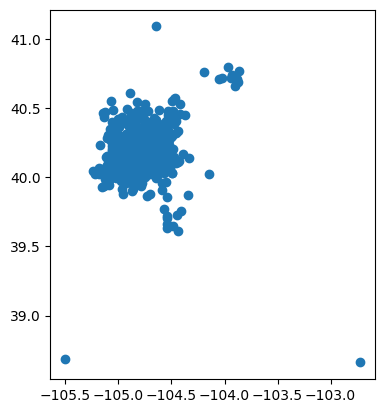

In [18]:
raptors.plot()

<Axes: >

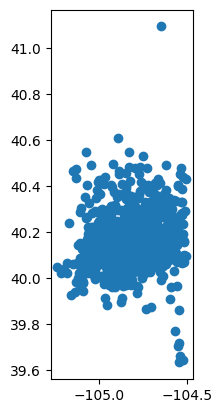

In [19]:
raptors.cx[:-104.5, 39.5:].plot()

<Axes: >

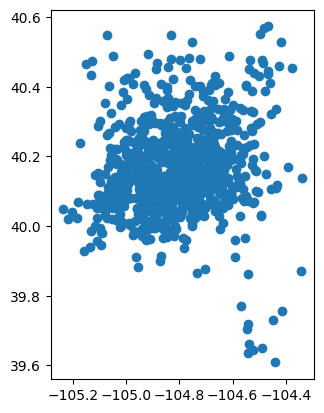

In [20]:
raptors = raptors.cx[:-104.3, 39.5:40.6]
raptors.plot()

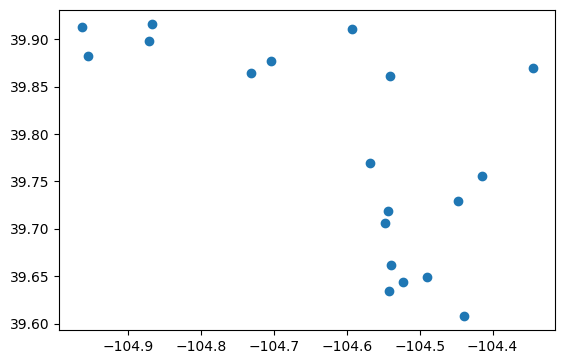

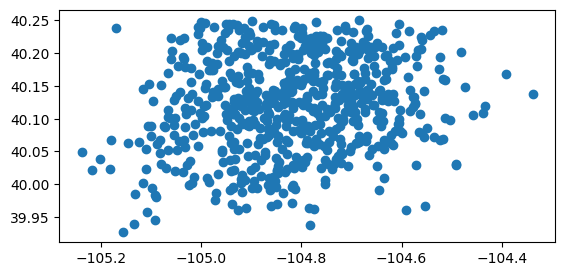

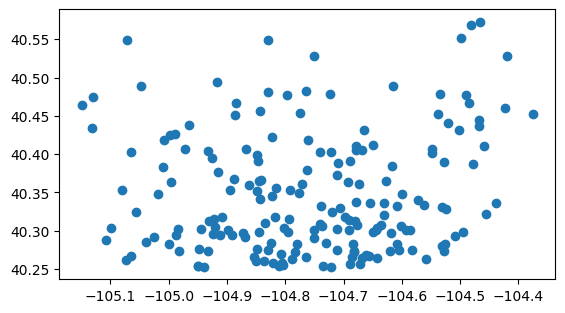

In [21]:
y_min=raptors["lat_y_dd"].min()
y_max=raptors["lat_y_dd"].max()
y_step = (y_max-y_min)/3
for i in range(3):
    raptors.cx[:, y_min + i*y_step:y_min + (i+1)*y_step].plot()
    

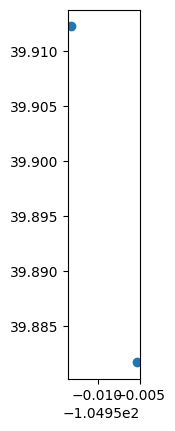

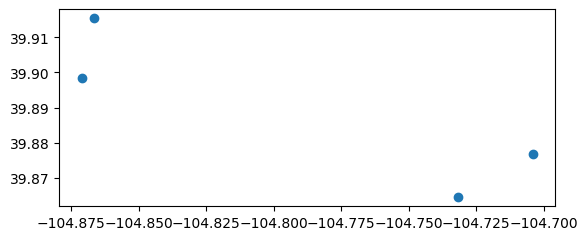

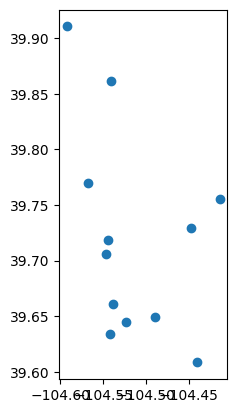

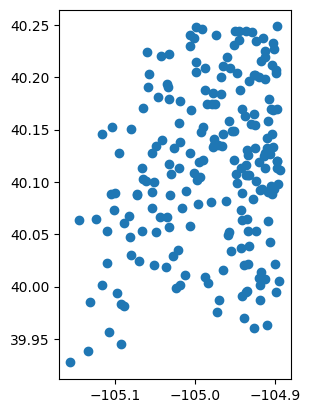

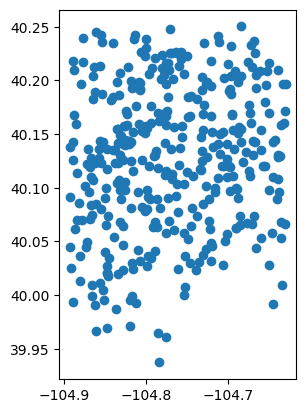

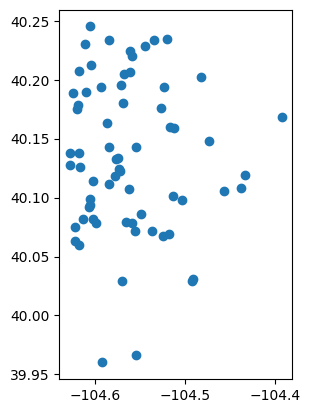

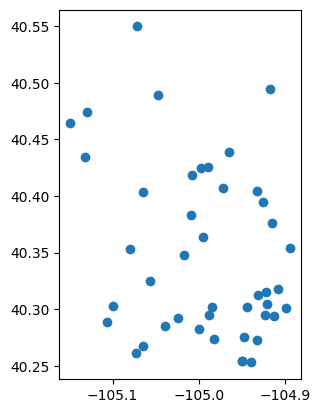

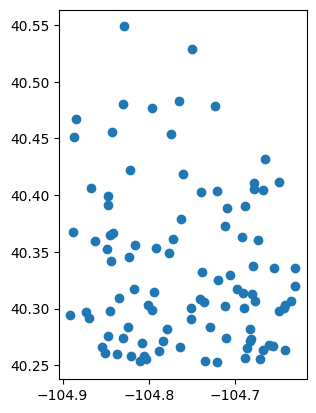

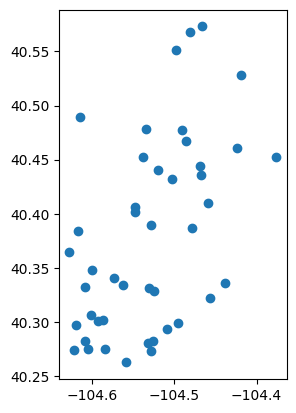

In [22]:
y_min=raptors["lat_y_dd"].min()
y_max=raptors["lat_y_dd"].max()
y_step = (y_max-y_min)/3
x_min=raptors["long_x_dd"].min()
x_max=raptors["long_x_dd"].max()
x_step = (x_max-x_min)/3
for y in range(3):
    for x in range(3):
        raptors.cx[x_min + x*x_step:x_min + (x+1)*x_step, y_min + y*y_step:y_min + (y+1)*y_step].plot()

## Referencing cell values with loc, iloc, and at

### loc - referencing by column and row index values

In [23]:
raptors.columns

Index(['postgis_fi', 'lat_y_dd', 'long_x_dd', 'lastsurvey', 'recentspec',
       'recentstat', 'Nest_ID', 'geometry'],
      dtype='object')

In [24]:
raptors.index

Index([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       869, 870, 871, 872, 873, 874, 875, 876, 877, 878],
      dtype='int64', length=862)

In [25]:
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712)
...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297)
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975)
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432)
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443)


In [26]:
raptors.loc[877, 'lastsurvey']

'2020-05-05'

In [27]:
raptors.loc[3:10, 'lastsurvey':'Nest_ID']

,lastsurvey,recentspec,recentstat,Nest_ID
3,2011-01-06,Swainsons Hawk,INACTIVE NEST,2
4,2014-07-03,Swainsons Hawk,ACTIVE NEST,3
5,2011-01-06,Red-tail Hawk,FLEDGED NEST,4
6,2011-01-06,Swainsons Hawk,INACTIVE NEST,5
7,2011-01-06,Swainsons Hawk,ACTIVE NEST,6
8,2011-01-06,Swainsons Hawk,FLEDGED NEST,7
9,2011-01-06,Red-tail Hawk,INACTIVE NEST,8
10,2011-01-06,Swainsons Hawk,FLEDGED NEST,9


In [28]:
raptors.loc[[10, 3, 5], ['Nest_ID', 'lat_y_dd', 'recentspec']]

,Nest_ID,lat_y_dd,recentspec
10,9,40.000189,Swainsons Hawk
3,2,40.309574,Swainsons Hawk
5,4,40.217638,Red-tail Hawk


In [29]:
for row in raptors.index:
    for col in raptors.columns:
        print(row, col, raptors.loc[row, col])

0 postgis_fi 361.0
0 lat_y_dd 40.267502
0 long_x_dd -104.870872
0 lastsurvey 2012-03-16
0 recentspec Swainsons Hawk
0 recentstat INACTIVE NEST
0 Nest_ID 361
0 geometry POINT (-104.79595 40.29891)
1 postgis_fi 362.0
1 lat_y_dd 40.264321
1 long_x_dd -104.860255
1 lastsurvey 2012-03-16
1 recentspec Swainsons Hawk
1 recentstat INACTIVE NEST
1 Nest_ID 362
1 geometry POINT (-104.78897 40.22089)
3 postgis_fi 2.0
3 lat_y_dd 40.309574
3 long_x_dd -104.932604
3 lastsurvey 2011-01-06
3 recentspec Swainsons Hawk
3 recentstat INACTIVE NEST
3 Nest_ID 2
3 geometry POINT (-104.84889 40.35215)
4 postgis_fi 3.0
4 lat_y_dd 40.219343
4 long_x_dd -104.729246
4 lastsurvey 2014-07-03
4 recentspec Swainsons Hawk
4 recentstat ACTIVE NEST
4 Nest_ID 3
4 geometry POINT (-104.74466 40.18571)
5 postgis_fi 4.0
5 lat_y_dd 40.217638
5 long_x_dd -104.779386
5 lastsurvey 2011-01-06
5 recentspec Red-tail Hawk
5 recentstat FLEDGED NEST
5 Nest_ID 4
5 geometry POINT (-104.79963 40.15712)
6 postgis_fi 5.0
6 lat_y_dd 40.27120

### iloc - referencing by integers

shape property returns a tuple with the number of rows and columns

In [30]:
raptors.shape

(862, 8)

In [31]:
raptors.iloc[861, 4]

'RTHA'

In [32]:
raptors.iloc[100:200, 2:4]

,long_x_dd,lastsurvey
102,-104.828065,2014-06-09
103,-104.827100,2008-04-25
104,-104.826561,2008-04-25
105,-104.824545,2008-04-25
106,-104.820562,2008-04-25
...,...,...
197,-104.449951,2010-10-26
198,-104.668929,2010-10-26
199,-104.948514,2011-04-06
200,-104.848436,2011-04-06


In [33]:
raptors.iloc[[103, 197, 200], [1, 2, 5]]

,lat_y_dd,long_x_dd,recentstat
105,40.058384,-104.824545,ACTIVE NEST
199,40.112731,-104.948514,ACTIVE NEST
202,40.172293,-104.784592,INACTIVE NEST


In [34]:
for x in range(raptors.shape[0]):
    for y in range(raptors.shape[1]):
        print(x, y, raptors.iloc[x,y])

0 0 361.0
0 1 40.267502
0 2 -104.870872
0 3 2012-03-16
0 4 Swainsons Hawk
0 5 INACTIVE NEST
0 6 361
0 7 POINT (-104.79595 40.29891)
1 0 362.0
1 1 40.264321
1 2 -104.860255
1 3 2012-03-16
1 4 Swainsons Hawk
1 5 INACTIVE NEST
1 6 362
1 7 POINT (-104.78897 40.22089)
2 0 2.0
2 1 40.309574
2 2 -104.932604
2 3 2011-01-06
2 4 Swainsons Hawk
2 5 INACTIVE NEST
2 6 2
2 7 POINT (-104.84889 40.35215)
3 0 3.0
3 1 40.219343
3 2 -104.729246
3 3 2014-07-03
3 4 Swainsons Hawk
3 5 ACTIVE NEST
3 6 3
3 7 POINT (-104.74466 40.18571)
4 0 4.0
4 1 40.217638
4 2 -104.779386
4 3 2011-01-06
4 4 Red-tail Hawk
4 5 FLEDGED NEST
4 6 4
4 7 POINT (-104.79963 40.15712)
5 0 5.0
5 1 40.271203
5 2 -104.740819
5 3 2011-01-06
5 4 Swainsons Hawk
5 5 INACTIVE NEST
5 6 5
5 7 POINT (-104.6679 40.26382)
6 0 6.0
6 1 40.357587
6 2 -104.737632
6 3 2011-01-06
6 4 Swainsons Hawk
6 5 ACTIVE NEST
6 6 6
6 7 POINT (-104.67679 40.30686)
7 0 7.0
7 1 40.35966
7 2 -104.730698
7 3 2011-01-06
7 4 Swainsons Hawk
7 5 FLEDGED NEST
7 6 7
7 7 POINT

### at and iat - referencing single cell

Similar to loc and iloc but can only be used to reference a single cell

Values can be assigned

In [35]:
for x in range(raptors.shape[0]):
    for y in range(raptors.shape[1]):
        print(x, y, raptors.iat[x,y])

0 0 361.0
0 1 40.267502
0 2 -104.870872
0 3 2012-03-16
0 4 Swainsons Hawk
0 5 INACTIVE NEST
0 6 361
0 7 POINT (-104.79595 40.29891)
1 0 362.0
1 1 40.264321
1 2 -104.860255
1 3 2012-03-16
1 4 Swainsons Hawk
1 5 INACTIVE NEST
1 6 362
1 7 POINT (-104.78897 40.22089)
2 0 2.0
2 1 40.309574
2 2 -104.932604
2 3 2011-01-06
2 4 Swainsons Hawk
2 5 INACTIVE NEST
2 6 2
2 7 POINT (-104.84889 40.35215)
3 0 3.0
3 1 40.219343
3 2 -104.729246
3 3 2014-07-03
3 4 Swainsons Hawk
3 5 ACTIVE NEST
3 6 3
3 7 POINT (-104.74466 40.18571)
4 0 4.0
4 1 40.217638
4 2 -104.779386
4 3 2011-01-06
4 4 Red-tail Hawk
4 5 FLEDGED NEST
4 6 4
4 7 POINT (-104.79963 40.15712)
5 0 5.0
5 1 40.271203
5 2 -104.740819
5 3 2011-01-06
5 4 Swainsons Hawk
5 5 INACTIVE NEST
5 6 5
5 7 POINT (-104.6679 40.26382)
6 0 6.0
6 1 40.357587
6 2 -104.737632
6 3 2011-01-06
6 4 Swainsons Hawk
6 5 ACTIVE NEST
6 6 6
6 7 POINT (-104.67679 40.30686)
7 0 7.0
7 1 40.35966
7 2 -104.730698
7 3 2011-01-06
7 4 Swainsons Hawk
7 5 FLEDGED NEST
7 6 7
7 7 POINT

In [36]:
raptors.iat[200, 4]

'Red-tail Hawk'

In [37]:
raptors['recentspec'].unique()

array(['Swainsons Hawk', 'Red-tail Hawk', 'Northern Harrier', 'SWHA',
       'RTHA'], dtype=object)

In [38]:
raptors.iat[200,4] = "Great Blue Heron"
raptors.iat[200,4]

'Great Blue Heron'

In [39]:
raptors['recentspec'].unique()

array(['Swainsons Hawk', 'Red-tail Hawk', 'Great Blue Heron',
       'Northern Harrier', 'SWHA', 'RTHA'], dtype=object)

## Series Math

In [40]:
raptors['long_x_dd']/raptors['lat_y_dd']

0     -2.604355
1     -2.604297
3     -2.603168
4     -2.603952
5     -2.605309
         ...   
874   -2.621904
875   -2.622577
876         NaN
877         NaN
878   -2.607532
Length: 862, dtype: float64

### Creating a new column

In [41]:
raptors['long_plus_lat'] = raptors['long_x_dd']+raptors['lat_y_dd']

C:\Anaconda\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [42]:
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,long_plus_lat
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891),-64.603370
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089),-64.595934
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215),-64.623030
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571),-64.509903
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712),-64.561748
...,...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297),-64.887420
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975),-64.901252
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432),NaN
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443),NaN


### dropping a row

In [43]:
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,long_plus_lat
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891),-64.603370
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089),-64.595934
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215),-64.623030
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571),-64.509903
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (-104.79963 40.15712),-64.561748
...,...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297),-64.887420
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975),-64.901252
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432),NaN
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443),NaN


In [44]:
raptors.drop(877, inplace=True)

C:\Users\merve\AppData\Local\Temp\ipykernel_9824\835956334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors.drop(877, inplace=True)


### dropping a column

In [45]:
raptors.drop('long_plus_lat', axis=1, inplace=True)

C:\Users\merve\AppData\Local\Temp\ipykernel_9824\3918226479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors.drop('long_plus_lat', axis=1, inplace=True)


## Choosing a column to use as an index

In [46]:
raptors.set_index('Nest_ID', verify_integrity=True, inplace=True)

In [47]:
raptors.drop(1002, inplace=True)

C:\Users\merve\AppData\Local\Temp\ipykernel_9824\2240903040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raptors.drop(1002, inplace=True)


In [48]:
raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,geometry
Nest_ID,,,,,,,
361,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,POINT (-104.79595 40.29891)
362,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,POINT (-104.78897 40.22089)
2,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,POINT (-104.84889 40.35215)
3,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,POINT (-104.74466 40.18571)
4,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,POINT (-104.79963 40.15712)
...,...,...,...,...,...,...,...
909,909.0,39.999138,-104.899116,2015-08-18,Swainsons Hawk,INACTIVE NEST,POINT (-104.91958 40.00116)
910,910.0,40.002516,-104.893713,2015-08-18,Red-tail Hawk,INACTIVE NEST,POINT (-104.83619 39.98674)
911,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,POINT (-104.98394 40.00297)


In [49]:
raptors.sort_values(['recentspec', 'recentstat', 'lastsurvey'], ascending=[True, True, False])

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,geometry
Nest_ID,,,,,,,
199,199.0,40.172293,-104.784592,2011-04-06,Great Blue Heron,INACTIVE NEST,POINT (-104.87040 40.13612)
9991,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,POINT (-104.95039 40.24432)
425,425.0,40.145475,-104.650133,2015-08-18,Red-tail Hawk,ACTIVE NEST,POINT (-104.60960 40.18963)
589,589.0,40.204444,-104.659728,2015-08-05,Red-tail Hawk,ACTIVE NEST,POINT (-104.58424 40.14329)
238,238.0,40.130103,-104.655518,2015-07-28,Red-tail Hawk,ACTIVE NEST,POINT (-104.57469 40.13347)
...,...,...,...,...,...,...,...
81,81.0,40.062840,-104.834489,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.83552 40.10434)
84,84.0,40.062771,-104.830749,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.91904 40.09191)
88,88.0,40.063599,-104.829832,2008-04-25,Swainsons Hawk,INACTIVE NEST,POINT (-104.89227 40.04444)
